In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import os

import numpy as np
import pandas as pd
pd.options.display.max_columns = 500
pd.options.plotting.backend = 'matplotlib'

# import umap.plot
# import plotly.io as pio
# import plotly.express as px
# pio.templates.default = "plotly_white" # "plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"

sns.set_style("whitegrid")

plt.rcParams['text.usetex'] = True

%matplotlib inline


In [7]:
df = pd.read_csv(
    "data/NOTEEVENTS.csv",
    #     na_values=[ '', ' ', '?', '?|?','None', '-NaN', '-nan', '', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null']
)  # .fillna(np.nan)


In [8]:
df.TEXT

0          Admission Date:  [**2151-7-16**]       Dischar...
1          Admission Date:  [**2118-6-2**]       Discharg...
2          Admission Date:  [**2119-5-4**]              D...
3          Admission Date:  [**2124-7-21**]              ...
4          Admission Date:  [**2162-3-3**]              D...
                                 ...                        
2083175    NPN\n\n\n#1  Infant remains in RA with O2 sats...
2083176    Neonatology\nDOL #5, CGA 36 weeks.\n\nCVR: Con...
2083177    Family Meeting Note\nFamily meeting held with ...
2083178    NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...
2083179    NPN 1800\nNursing Addendum:\n[**Known lastname...
Name: TEXT, Length: 2083180, dtype: object

In [12]:
import flash
from flash.text import TextClassificationData, TextEmbedder

# Wrapping the prediction data inside a datamodule
datamodule = TextClassificationData.from_lists(
    predict_data=df["TEXT"].to_list()[:384],
    batch_size=10,
)

# We are loading a pre-trained SentenceEmbedder
model = TextEmbedder(backbone="sentence-transformers/all-MiniLM-L6-v2")


Using 'sentence-transformers/all-MiniLM-L6-v2' provided by Hugging Face/transformers (https://github.com/huggingface/transformers).
Using 'Pooling' provided by UKPLab/sentence-transformers (https://github.com/UKPLab/sentence-transformers).


In [13]:
trainer = flash.Trainer(gpus=0)

# Since this task is tackled unsupervised, the predict method generates sentence embeddings using the prediction input
embeddings = trainer.predict(model, datamodule=datamodule)
flatten_embeddings = np.array([item.numpy() for sublist in embeddings for item in sublist])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

In [14]:
print(flatten_embeddings.shape)

(384, 384)


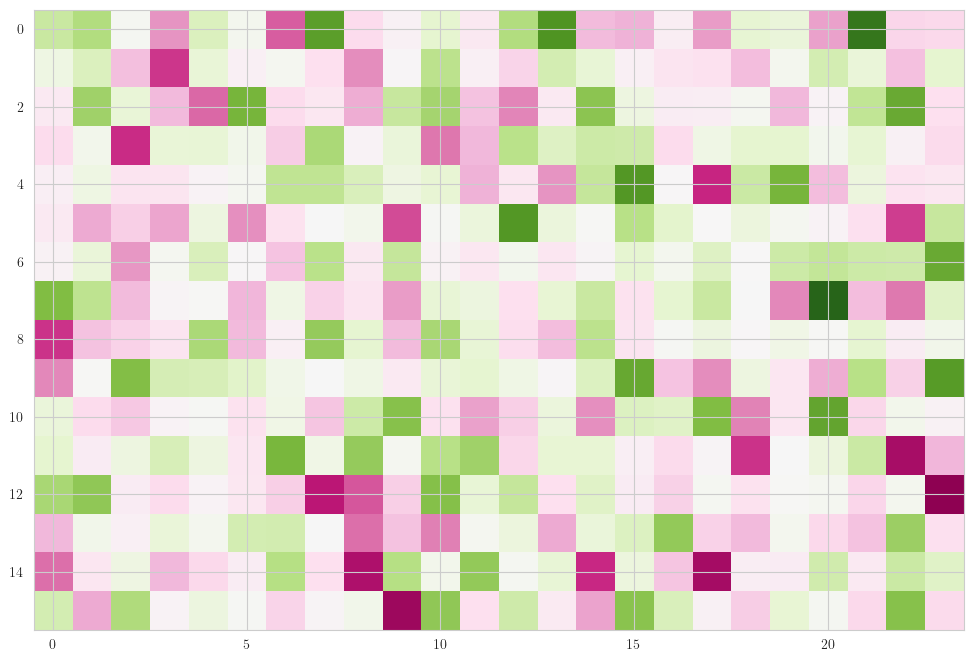

In [55]:
fig = plt.figure(figsize=(12, 12))
# img = np.abs(flatten_embeddings)
img = flatten_embeddings[:1].reshape(16, -1)
# img = flatten_embeddings
img -= img.mean()
img /= img.std()
plt.imshow(img, cmap=plt.cm.PiYG)


In [48]:
text = df["TEXT"][0]
text 

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [51]:
import stanza

nlp = stanza.Pipeline(lang='en', processors='tokenize')
doc = nlp(text)

2023-01-11 14:55:15 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-01-11 14:55:16 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2023-01-11 14:55:16 INFO: Use device: cpu
2023-01-11 14:55:16 INFO: Loading: tokenize
2023-01-11 14:55:16 INFO: Done loading processors!


In [52]:
print(len(doc.sentences))
print(doc.num_words)

16
152


In [53]:
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(
        *[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n'
    )


====== Sentence 1 tokens =======
id: (1,)	text: Admission
id: (2,)	text: Date
id: (3,)	text: :
id: (4,)	text: [**2151-7-16**]
====== Sentence 2 tokens =======
id: (1,)	text: Discharge
id: (2,)	text: Date
id: (3,)	text: :
id: (4,)	text: [**2151-8-4**]
====== Sentence 3 tokens =======
id: (1,)	text: Service
id: (2,)	text: :
id: (3,)	text: ADDENDUM
id: (4,)	text: :
====== Sentence 4 tokens =======
id: (1,)	text: RADIOLOGIC
id: (2,)	text: STUDIES
id: (3,)	text: :
id: (4,)	text: Radiologic
id: (5,)	text: studies
id: (6,)	text: also
id: (7,)	text: included
id: (8,)	text: a
id: (9,)	text: chest
id: (10,)	text: CT
id: (11,)	text: ,
id: (12,)	text: which
id: (13,)	text: confirmed
id: (14,)	text: cavitary
id: (15,)	text: lesions
id: (16,)	text: in
id: (17,)	text: the
id: (18,)	text: left
id: (19,)	text: lung
id: (20,)	text: apex
id: (21,)	text: consistent
id: (22,)	text: with
id: (23,)	text: infectious
id: (24,)	text: process
id: (25,)	text: /
id: (26,)	text: tuberculosis
id: (27,)	text: .
=====